**Ques 1**

In [563]:
from google.colab import drive, files
import pandas as pd
import numpy as np
from random import seed
from random import random
from random import randrange
# import seaborn as sns
# import matplotlib.pyplot as plt
import os

# from sklearn.preprocessing import StandardScaler
# import zipfile

In [564]:
df= pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv')
df.columns = ['Area', 'Perimeter','Compactness','Kernel Length', 'Kernel Width','Asymmetry coefficient','Kernel Groove', 'Type' ]
new_row = {'Area':15.26, 'Perimeter':14.84, 'Compactness':0.871, 'Kernel Length':5.763, 'Kernel Width':3.312, 'Asymmetry coefficient':2.221, 'Kernel Groove':5.22, 'Type':1}
df = df.append(new_row, ignore_index=True)
print(df.dtypes)
print('\nNumber of rows and columns in the data set: ',df.shape)
df

Area                     float64
Perimeter                float64
Compactness              float64
Kernel Length            float64
Kernel Width             float64
Asymmetry coefficient    float64
Kernel Groove            float64
Type                     float64
dtype: object

Number of rows and columns in the data set:  (210, 8)


,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel Groove,Type
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1.0
...,...,...,...,...,...,...,...,...
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0
208,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3.0


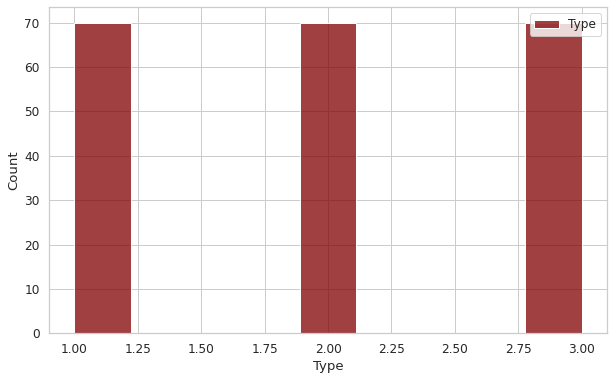

In [565]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 6]})
sns.histplot(data = df, x="Type", color="maroon", label="Type")
plt.legend() 
plt.show()

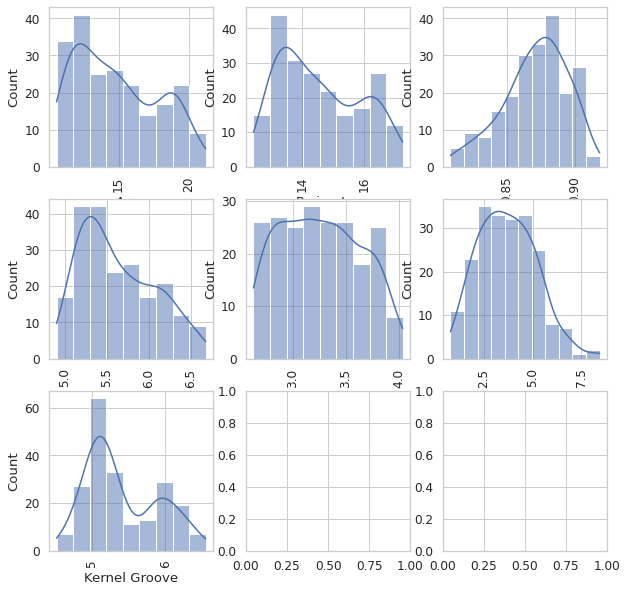

In [566]:
X = ['Area',	'Perimeter',	'Compactness'	,'Kernel Length',	'Kernel Width',	'Asymmetry coefficient'	,'Kernel Groove']
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for variable, subplot in zip(X, ax.flatten()):
    sns.histplot(df[variable], ax=subplot, kde=True)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<Figure size 360x360 with 0 Axes>

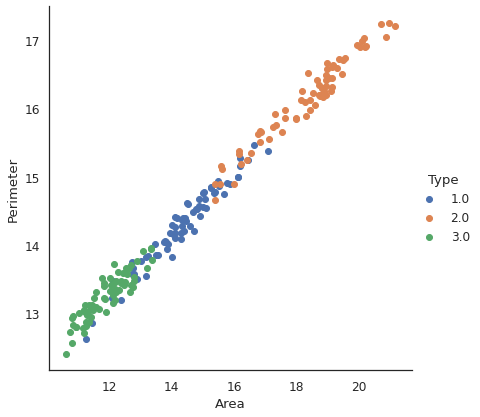

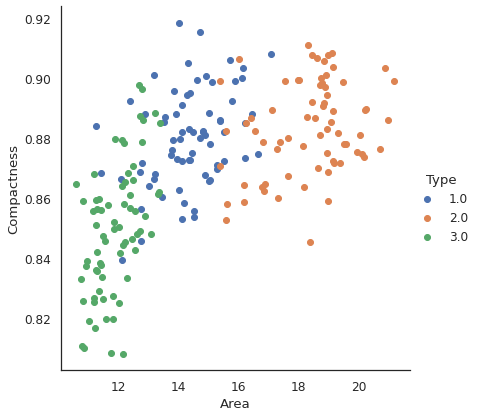

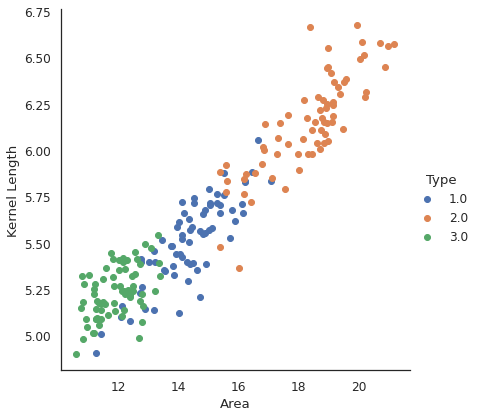

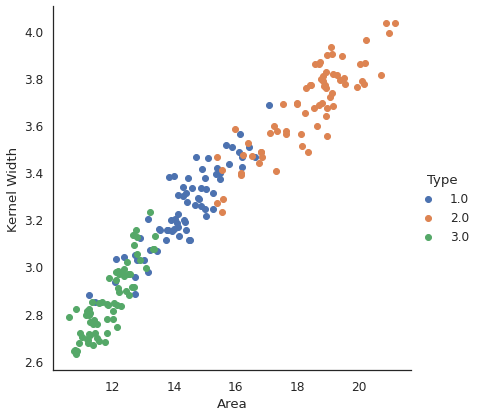

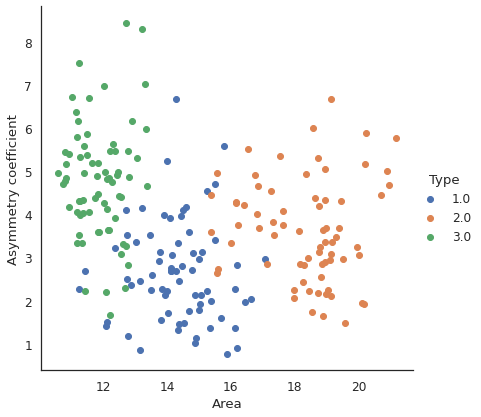

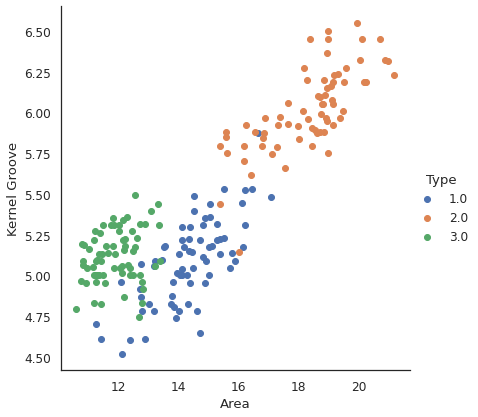

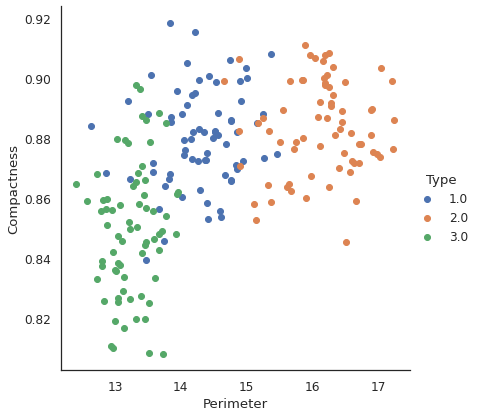

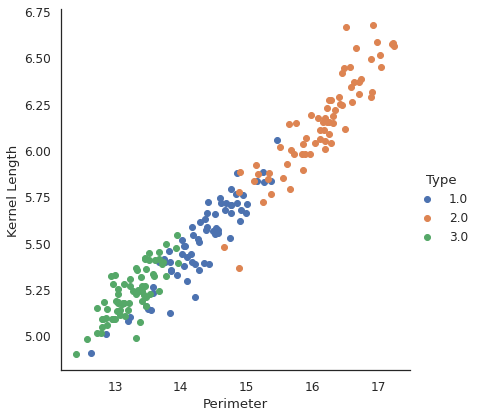

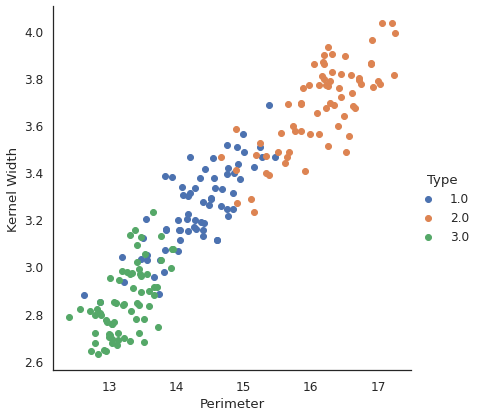

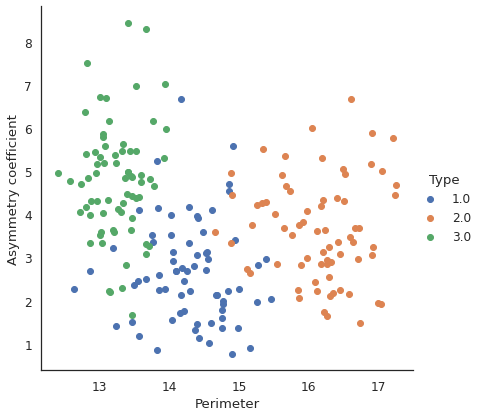

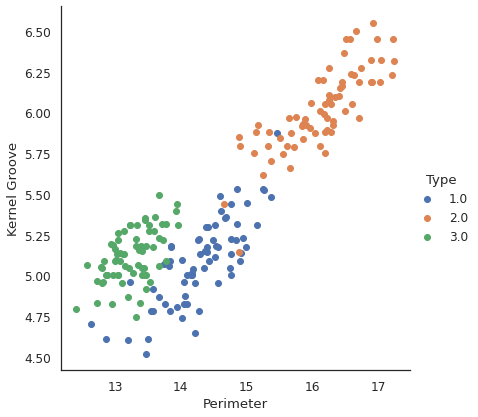

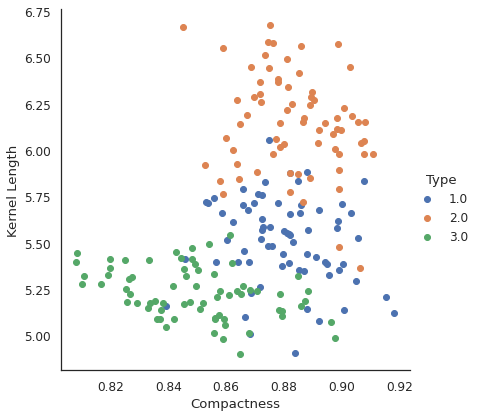

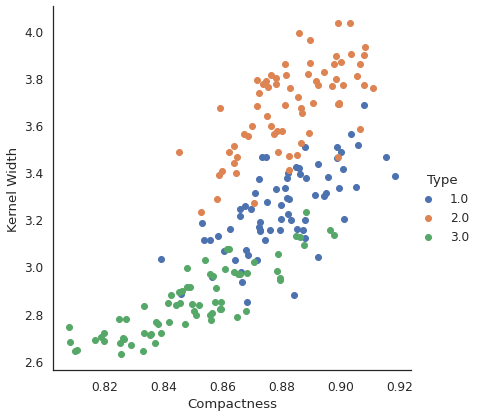

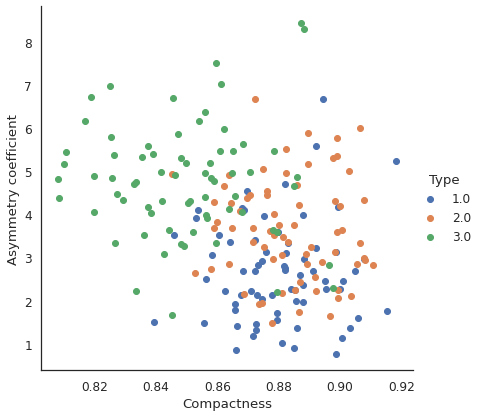

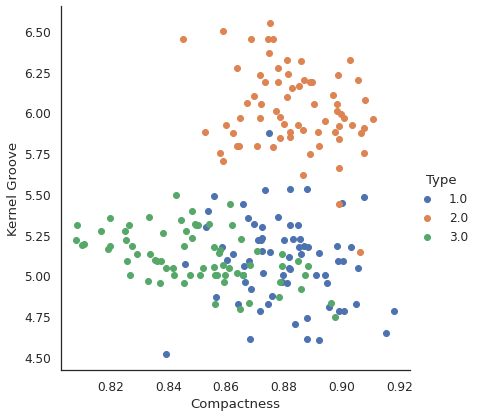

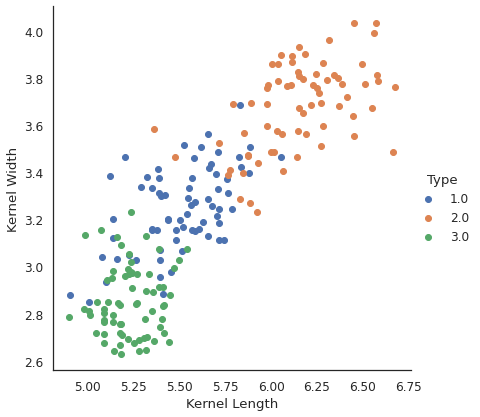

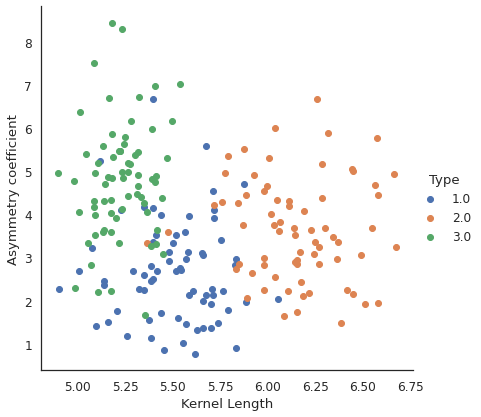

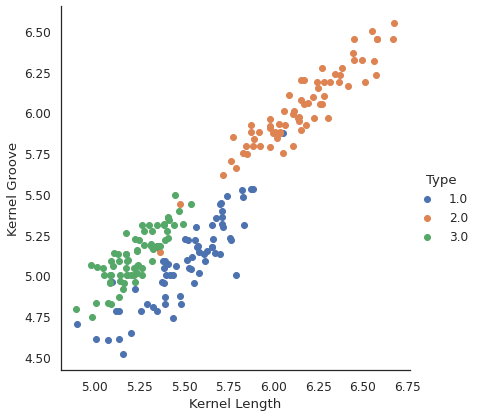

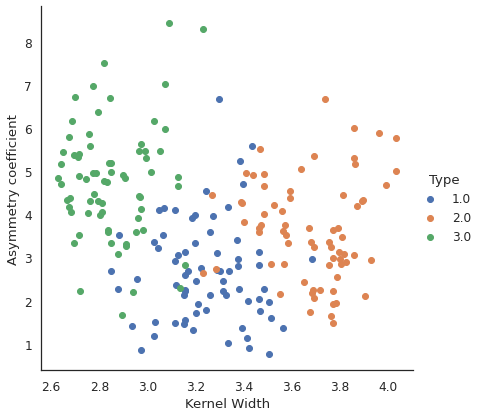

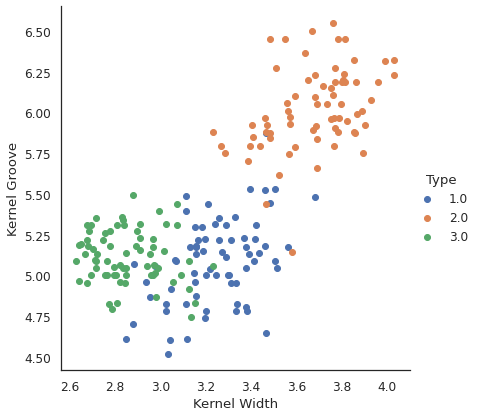

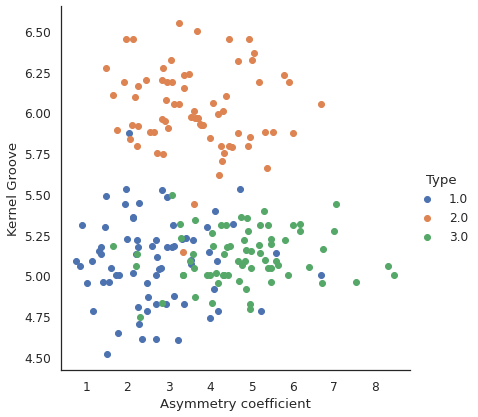

In [567]:
X = ['Area',	'Perimeter',	'Compactness'	,'Kernel Length',	'Kernel Width',	'Asymmetry coefficient'	,'Kernel Groove']
fig, ax = plt.subplots(0, 0, figsize=(5, 5))
for i in range(len(X)):
  for j in range(i+1,len(X)):
    sns.set_style("white")
    sns.FacetGrid(df, hue ="Type", height = 6).map(plt.scatter, X[i], X[j]).add_legend()
    plt.show()

In [568]:
# as the classes werent shuffles this could increase the bias of the model
df = df.sample(frac=1) 
df

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel Groove,Type
138,16.23,15.18,0.8850,5.872,3.472,3.769,5.922,2.0
62,13.22,13.84,0.8680,5.395,3.070,4.157,5.088,1.0
191,11.87,13.02,0.8795,5.132,2.953,3.597,5.132,3.0
80,18.72,16.19,0.8977,6.006,3.857,5.324,5.879,2.0
117,18.89,16.23,0.9008,6.227,3.769,3.639,5.966,2.0
...,...,...,...,...,...,...,...,...
106,17.63,15.86,0.8800,6.033,3.573,3.747,5.929,2.0
6,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1.0
175,11.26,13.01,0.8355,5.186,2.710,5.335,5.092,3.0
9,15.26,14.85,0.8696,5.714,3.242,4.543,5.314,1.0


In [569]:
#Check for missing value
print(df.isnull())
print(df.isnull().sum())

      Area  Perimeter  Compactness  ...  Asymmetry coefficient  Kernel Groove   Type
138  False      False        False  ...                  False          False  False
62   False      False        False  ...                  False          False  False
191  False      False        False  ...                  False          False  False
80   False      False        False  ...                  False          False  False
117  False      False        False  ...                  False          False  False
..     ...        ...          ...  ...                    ...            ...    ...
106  False      False        False  ...                  False          False  False
6    False      False        False  ...                  False          False  False
175  False      False        False  ...                  False          False  False
9    False      False        False  ...                  False          False  False
65   False      False        False  ...                  False   

In [570]:
# desribe the dataset (Exploratory data analysis) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 138 to 65
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   210 non-null    float64
 1   Perimeter              210 non-null    float64
 2   Compactness            210 non-null    float64
 3   Kernel Length          210 non-null    float64
 4   Kernel Width           210 non-null    float64
 5   Asymmetry coefficient  210 non-null    float64
 6   Kernel Groove          210 non-null    float64
 7   Type                   210 non-null    float64
dtypes: float64(8)
memory usage: 14.8 KB


In [571]:
df.describe()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel Groove,Type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


                           Area  Perimeter  ...  Kernel Groove      Type
Area                   1.000000   0.994341  ...       0.863693 -0.346058
Perimeter              0.994341   1.000000  ...       0.890784 -0.327900
Compactness            0.608288   0.529244  ...       0.226825 -0.531007
Kernel Length          0.949985   0.972422  ...       0.932806 -0.257269
Kernel Width           0.970771   0.944829  ...       0.749131 -0.423463
Asymmetry coefficient -0.229572  -0.217340  ...      -0.011079  0.577273
Kernel Groove          0.863693   0.890784  ...       1.000000  0.024301
Type                  -0.346058  -0.327900  ...       0.024301  1.000000

[8 rows x 8 columns]


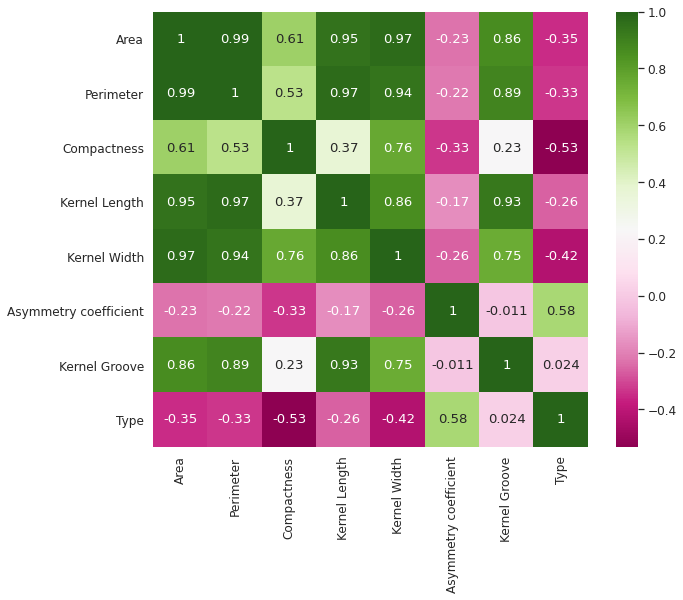

In [572]:
# correlation plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8]
corrMatrix = df.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True, cmap='PiYG',square=True)
plt.show()

In [573]:
from sklearn.model_selection import train_test_split
dataset = df.values.tolist()
print(dataset)
X = df.drop(columns = ['Type'])
Y = df['Type']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,shuffle=True, random_state=42)

[[16.23, 15.18, 0.885, 5.872000000000001, 3.472, 3.7689999999999997, 5.922000000000001, 2.0], [13.22, 13.84, 0.868, 5.395, 3.07, 4.157, 5.088, 1.0], [11.87, 13.02, 0.8795, 5.132000000000001, 2.9530000000000003, 3.597, 5.132000000000001, 3.0], [18.72, 16.19, 0.8977, 6.006, 3.8569999999999998, 5.324, 5.879, 2.0], [18.89, 16.23, 0.9008, 6.227, 3.7689999999999997, 3.639, 5.966, 2.0], [11.27, 12.86, 0.8563, 5.091, 2.804, 3.985, 5.001, 3.0], [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781000000000001, 1.0], [18.72, 16.34, 0.8809999999999999, 6.218999999999999, 3.6839999999999997, 2.188, 6.097, 2.0], [11.83, 13.23, 0.8496, 5.263, 2.84, 5.195, 5.307, 3.0], [18.55, 16.22, 0.8865, 6.153, 3.674, 1.7380000000000002, 5.894, 2.0], [15.6, 15.11, 0.858, 5.832000000000001, 3.286, 2.725, 5.752000000000001, 2.0], [12.74, 13.67, 0.8564, 5.395, 2.9560000000000004, 2.504, 4.869, 1.0], [18.17, 16.26, 0.8637, 6.271, 3.512, 2.853, 6.273, 2.0], [14.7, 14.21, 0.9153, 5.205, 3.466, 1.767, 4.649, 1.0], [17.32, 1

In [574]:
# Find the min and max values for each column
def dataset_minmax(dataset):
  minmax = []
  stats = [[min(df[column]), max(df[column])] for column in list(df)]
  return stats

In [575]:
def normalize_dataset(dataset, minmax):
  for row in dataset:  
    for i in range(1,len(row)):
      # print(row)
      row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [576]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = []
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [577]:
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

In [578]:
# Transfer neuron activation
from math import exp
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

In [579]:
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

In [580]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

In [581]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = []
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [582]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

In [583]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[int(row[-1])] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [584]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
  folds = (cross_validation_split(dataset, n_folds))
  scores = []
  for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = []
    for row in fold:
      row_copy = list(row)
      test_set.append(row_copy)
      row_copy[-1] = None
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[-1] for row in fold]
    accuracy = accuracy_metric(actual, predicted)
    scores.append(accuracy)
  return scores

In [585]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = []
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(0,len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(list(fold))
    return dataset_split

In [586]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [587]:
# Make a prediction with a network
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

In [588]:
# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = []
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction)
	return(predictions)

In [589]:
# Test Backprop on Seeds dataset
seed(40)
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.04 #stable output
n_epoch = 500
n_hidden = 3 # in range 1-3
print(dataset)
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

[[16.23, 0.5723140495867768, 0.6978221415607985, 0.5478603603603609, 0.600142551674982, 0.3905784758610826, 0.6907927129492863, 0.5], [13.22, 0.2954545454545454, 0.5435571687840288, 0.27927927927927904, 0.31361368496079817, 0.441027708070577, 0.2801575578532743, 0.0], [11.87, 0.12603305785123955, 0.6479128856624313, 0.13119369369369402, 0.2302209550962226, 0.3682143832321315, 0.30182176267848376, 1.0], [18.72, 0.7809917355371904, 0.8130671506352091, 0.623310810810811, 0.8745545260156803, 0.592765476082123, 0.6696208764155587, 0.5], [18.89, 0.7892561983471075, 0.8411978221415611, 0.747747747747748, 0.8118317890235206, 0.3736753825950149, 0.7124569177744955, 0.5], [11.27, 0.0929752066115701, 0.4373865698729576, 0.10810810810810821, 0.12401995723449742, 0.41866361544162584, 0.23732151649433791, 1.0], [13.99, 0.2933884297520661, 1.0, 0.12387387387387375, 0.5367070563079115, 0.5810633345902301, 0.12900049236829172, 0.0], [18.72, 0.8119834710743802, 0.6615245009074399, 0.743243243243243, 0.7

In [590]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=8,random_state=42, max_iter=300, activation="tanh" ).fit(X_train, Y_train)
print(clf.n_layers_)
print(clf.out_activation_)
clf.predict(X_test)
print("Score:",clf.score(X_test, Y_test)*100 ,"%")

3
softmax
Score: 88.09523809523809 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


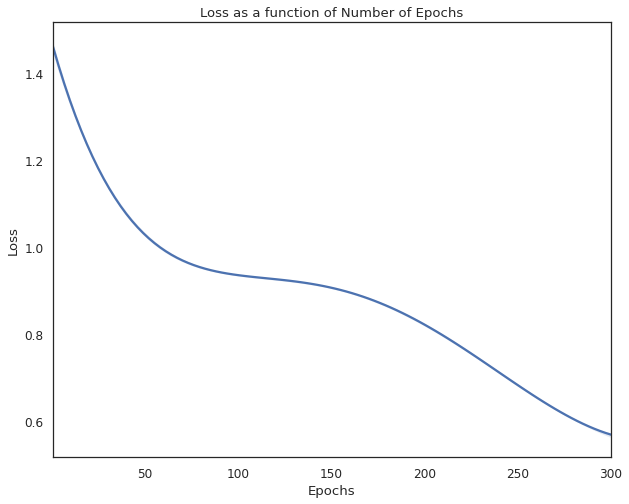

In [591]:
loss = clf.loss_curve_
epochs = [i+1 for i in range(len(loss))]
sns.regplot(x=epochs, y=loss, fit_reg=True, order=5, scatter=False, color='b')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss as a function of Number of Epochs")
plt.show()

In [592]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,shuffle=True, random_state=42)

In [593]:
# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1))

# compile the keras model
# op = Adam(learning_rate=0.03)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=500)

# evaluate the keras model
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/500
6/6 [==============================] - 1s 2ms/step - loss: -14.8075 - accuracy: 0.3434
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: -14.5137 - accuracy: 0.3538
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: -15.3975 - accuracy: 0.3137
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: -14.4808 - accuracy: 0.3486
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: -15.0719 - accuracy: 0.3380
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: -14.9596 - accuracy: 0.3295
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: -14.7020 - accuracy: 0.3582
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: -14.5137 - accuracy: 0.3387
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: -14.6317 - accuracy: 0.3576
Epoch 10/500
6/6 [==============================] - 0s 2ms/step - loss: -14.5091 - accuracy: 0.3585
Epoch 11/

**Ques 2**

In [594]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [595]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Mall_Customers.csv' 
df1 = pd.read_csv(file_path)
df1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [596]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [597]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [598]:
#Check for missing value
print(df1.isnull())
print(df1.isnull().sum())

     CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]
CustomerID                0
Gender                    0
Age                 

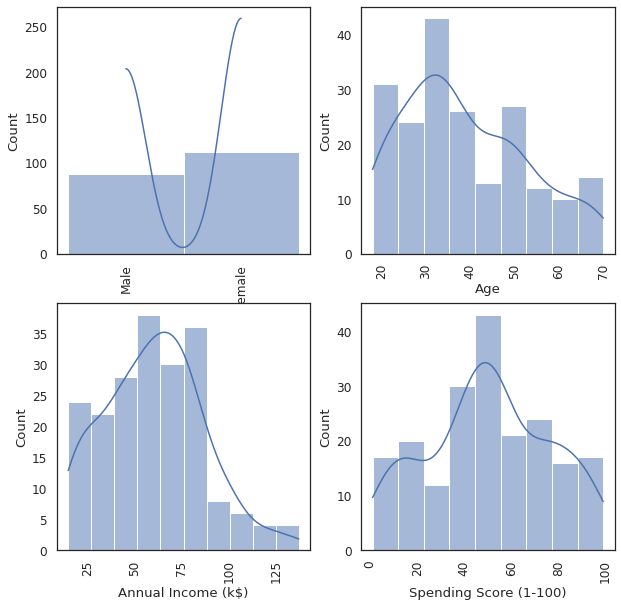

In [599]:
X = ['Gender',	'Age',	'Annual Income (k$)',	'Spending Score (1-100)']
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for variable, subplot in zip(X, ax.flatten()):
    sns.histplot(df1[variable], ax=subplot, kde=True)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

                        CustomerID  ...  Spending Score (1-100)
CustomerID                1.000000  ...                0.013835
Age                      -0.026763  ...               -0.327227
Annual Income (k$)        0.977548  ...                0.009903
Spending Score (1-100)    0.013835  ...                1.000000

[4 rows x 4 columns]


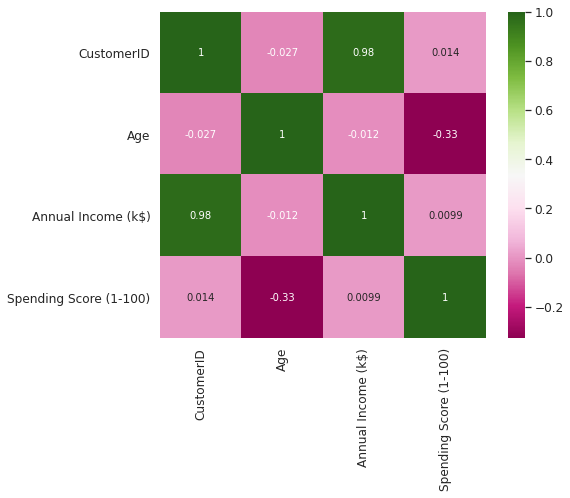

In [600]:
plt.rcParams['figure.figsize'] = [8,6]
corrMatrix = df1.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True, cmap='PiYG',square=True)
plt.show()

In [601]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [602]:
X=df1.drop(['CustomerID',	'Gender',	'Age'],axis=1)
X=X.to_numpy()
# df.drop(['Q', 'R'], axis=1)
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


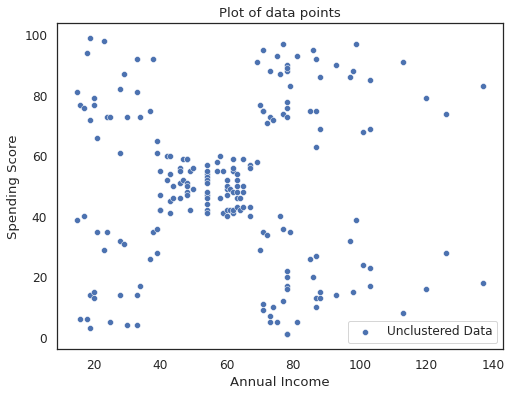

In [603]:
import seaborn as sns
sns.scatterplot(X[:,0],X[:,1],label='Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Plot of data points')
plt.legend()
plt.show()

In [604]:
import random
def fit(data,K,max_iter, thres):
  K, max_iter ,thres = K, max_iter ,thres
  centroids = dict()
  l1 = random.sample(range(0, len(data)), K)
  for i in range(K):
    centroids[i] = data[l1[i]]
  for i in range(max_iter):
    classifications = dict()
    classifications = {new_list: [] for new_list in range(K)}
    for d in data:
      distances = [np.linalg.norm(d-centroids[x]) for x in centroids]
      index = distances.index(min(distances))
      classifications[index].append(d)
    prevCent = dict(centroids)
    for i in classifications:
      centroids[i] = np.average(classifications[i],axis=0)
    flag=0
    for i in centroids:
      sum1=np.sum((centroids[i]-prevCent[i])/prevCent[i]*100.0)
      if sum1 > thres:
        print(sum1)
        flag = 1
    if (flag==0):
      break
  return centroids,classifications


In [605]:
def predict(data):
  centroids, classifications=fit(X, 5, 300, 0.001 )
  distances = [np.linalg.norm(data-centroids[i]) for i in centroids]
  classification = distances.index(min(distances))
  return classification

In [606]:
# model = K_Means()
centroids, classifications=fit(X, 5, 300, 0.001 )
# classifications = predict(X)
print(centroids)

50.83527583527584
45.46850998463903
88.09808612440192
17.96441947565543
27.79848863751026
1.482000824755021
29.8277158136411
3.5980540912462398
4.758577370777331
{0: array([90.83333333, 16.96666667]), 1: array([59.40625, 48.15625]), 2: array([33.57894737, 13.36842105]), 3: array([32.75      , 62.33333333]), 4: array([86.53846154, 82.12820513])}


{0: [array([73,  7]), array([74, 10]), array([75,  5]), array([77, 12]), array([78, 22]), array([78, 17]), array([78, 20]), array([78, 16]), array([78,  1]), array([78,  1]), array([79, 35]), array([81,  5]), array([85, 26]), array([86, 20]), array([87, 27]), array([87, 13]), array([87, 10]), array([88, 13]), array([88, 15]), array([93, 14]), array([97, 32]), array([98, 15]), array([99, 39]), array([101,  24]), array([103,  17]), array([103,  23]), array([113,   8]), array([120,  16]), array([126,  28]), array([137,  18])], 1: [array([46, 46]), array([47, 52]), array([48, 51]), array([48, 50]), array([48, 48]), array([48, 47]), array([49, 55]), array([49, 42]), array([50, 49]), array([50, 56]), array([54, 47]), array([54, 54]), array([54, 53]), array([54, 48]), array([54, 52]), array([54, 42]), array([54, 51]), array([54, 55]), array([54, 41]), array([54, 44]), array([54, 57]), array([54, 46]), array([57, 58]), array([57, 55]), array([58, 60]), array([58, 46]), array([59, 55]), array([

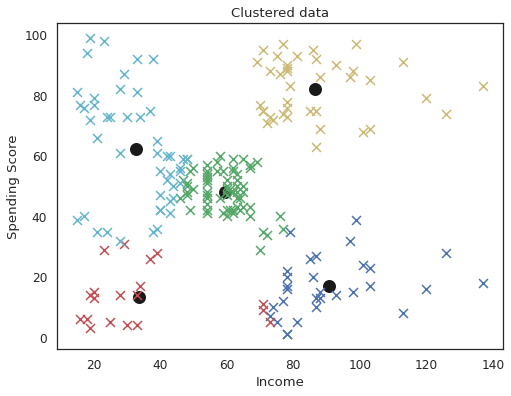

In [607]:
colors = ['b','g','r','c','y','m','pink','maroon','orange','lightblue','lightgreen']
for centroid in centroids:
    plt.scatter(centroids[centroid][0],centroids[centroid][1], marker="o", color="k", s=100, linewidths=3, label='Centroids')
print(classifications)
for classification in classifications:
    color = colors[classification]
    for featureset in classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=80, linewidths=3, label=labels[classification])
plt.xlabel('Income')
# plt.label('Clustered data')
plt.ylabel('Spending Score')
plt.title('Clustered data')
plt.show()

341.6594110115237
86.07231666055196
98.22097378277152
0.31929619371522666
0.53225590064206
66.34196726521532
74.04245022123894
9.704614071914115
10.07952664570562
16.789700742938074
11.820952933275041
10.230716086241252
2.3513015330665805
15.203037804973633
8.408664314534278
8.346948348001648
3.857766991849661
1.2491488785607636
0.597949339709712
3.55769230769231
33.55044699872287
26.701033045121285
4.218160079037816
13.108513170732806
18.552282951510662
6.960405783935201
5.435663153669371
15.53120541648484
5.645975998395247
36.36363636363636
5.3900580837098016
8.813492063492069
5.633375395519787
0.4640719773443598
330.8712121212121
261.96581196581195
60.48881673881673
0.39583918818952196
8.29227971565549
11.068257491675928
103.62132352941177
35.56547619047619
5.368903152475509
31.1613802147365
3.2052159649821657
1.6640743324846272
9.848505404060951
2.5883152173912887
0.24083324035576398
8.795097360877737
1.629232003682306
0.3736125619313852
4.954193874268432
0.8365313985967493
0.89533

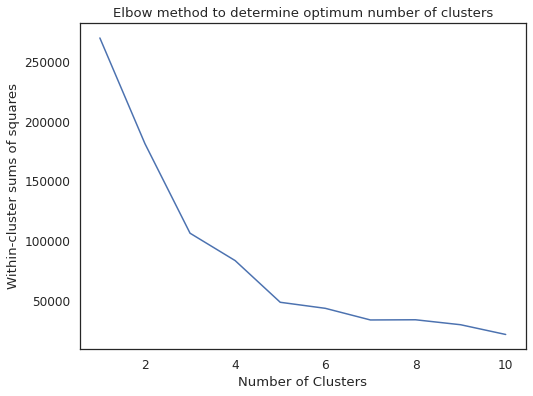

In [608]:
list1 = []
for K in range(1,11):
  centroids, classifications=fit(X, K, 300, 0.001 )
  # kmeans=K_Means_Cluster(K)
  # kmeans.fit(X)
  dist=0
  for k in range(K):
    sum1=np.sum((classifications[k]-centroids[k])**2)
    dist=dist+sum1
  list1.append(dist)
K_array=np.arange(1,11,1)
plt.plot(K_array,list1)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster sums of squares')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [609]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [610]:
centroids = kmeans.cluster_centers_
class_sk = kmeans.labels_
print(centroids)
print(class_sk)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]
[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 2 1 4 1 4 1 4 1 4 1 2 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


No handles with labels found to put in legend.


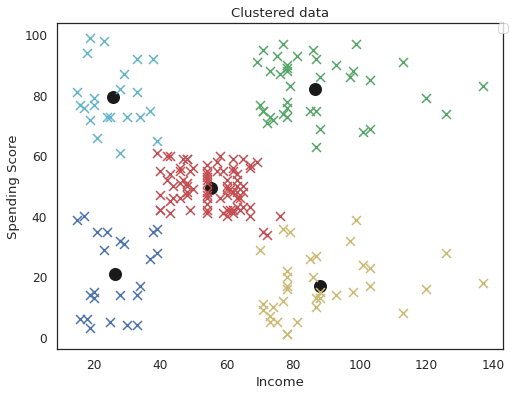

In [611]:
colors = ['b','g','r','c','y','m','pink','maroon','orange','lightblue','lightgreen']
labels=['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5', 'Cluster6', 'Cluster7', 'Cluster8', 'Cluster9', 'Cluster10', 'Cluster11']
for i in range(len(centroids)):
  plt.scatter(centroids[i][0], centroids[i][1],marker="o", color="k", s=100, linewidths=3)
liz = list(set(class_sk))
for i in range(len(X)):
  plt.scatter(X[i][0], X[i][1], marker="x", color=colors[class_sk[i]], s=80, linewidths=3)
  # del liz[liz.index(class_sk[i])]
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Clustered data')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

# colors = ['b','g','r','c','y','m','pink','maroon','orange','lightblue','lightgreen']
# labels=['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5', 'Cluster6', 'Cluster7', 'Cluster8', 'Cluster9', 'Cluster10', 'Cluster11']
# for centroid in centroids:
#     plt.scatter(centroids[centroid][0],centroids[centroid][1], marker="o", color="k", s=100, linewidths=3, label='Centroids')
# print(classifications)
# for classification in classifications:
#     color = colors[classification]
#     for featureset in classifications[classification]:
#         plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=80, linewidths=3, label=labels[classification])
# plt.xlabel('Income')
# # plt.label('Clustered data')
# plt.ylabel('Spending Score')
# plt.show()

**Ques 3**

In [612]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn import preprocessing
 

In [613]:

# load train and test dataset

# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((-1, 28, 28, 1))
testX = testX.reshape((-1, 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
# Import label encoder
# from sklearn import preprocessing
  
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
  
# # Encode labels in column 'species'.
# trainY= label_encoder.fit_transform(trainY)
# testY= label_encoder.fit_transform(testY)
# # return trainX, trainY, testX, testY
 

In [614]:

# scale pixels
# def prep_pixels(train, test):
	# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
	# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0
	# return normalized images
# return train_norm, test_norm

In [615]:
# define cnn model
# def define_model():
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# return model

In [616]:
# def evaluate_model(dataX, dataY, n_folds=5):
scores= []
histories = []
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits

for i, j in kfold.split(trainX):
	# define model
	# model = define_model()
	# select rows for train and test
	train_X, train_Y, test_X, test_Y = trainX[i], trainY[i], trainX[j], trainY[j]
	# fit model
	history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(test_X, test_Y), verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_X, test_Y, verbose=0)
	# print('> %.3f' % (acc * 100.0))
	# stores scores
	scores.append(acc)
	histories.append(history)
print("List of accuracies:", scores)
# return scores, histories
# scores, histories = evaluate_model(trainX, trainY)

List of accuracies: [0.9870833158493042, 0.9981666803359985, 1.0, 1.0, 1.0]


In [617]:
# # plot diagnostic learning curves
# def summarize_diagnostics(histories):
# 	for i in range(len(histories)):
# 		# plot loss
# 		pyplot.subplot(2, 1, 1)
# 		pyplot.title('Cross Entropy Loss')
# 		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
# 		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
# 		# plot accuracy
# 		pyplot.subplot(2, 1, 2)
# 		pyplot.title('Classification Accuracy')
# 		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
# 		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
# 	pyplot.show()

Mean Accuracy: 99.70499992370605
Standard Accuracy: 0.5033671978437485


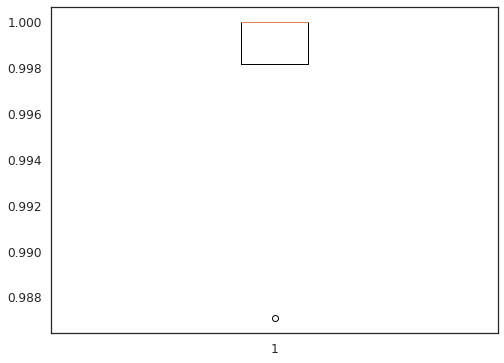

In [618]:
# summarize model performance
# def summarize_performance(scores):
# print summary
print("Mean Accuracy:",(mean(scores)*100))
print("Standard Accuracy:",std(scores)*100)
# print("n:",std(scores)*100)
# print('Accuracy: mean=%.3f std=%.3f, n=%d' % , , len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()

Using Pytorch

In [647]:
import torch
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [648]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)),])

In [649]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [650]:
dataiter = iter(trainloader)
#image inputting (pixels)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

img, label= trainset[0]
print("Image shape:", img.shape)
print("Label:", label)

torch.Size([64, 1, 28, 28])
torch.Size([64])
Image shape: torch.Size([1, 28, 28])
Label: 5


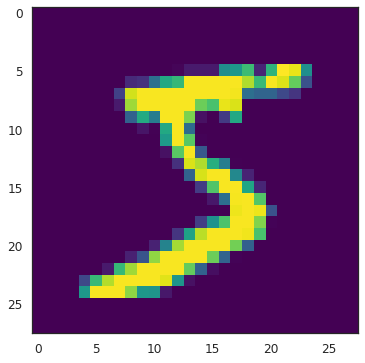

In [651]:
plt.imshow(img.reshape((28,28)), cmap="viridis")

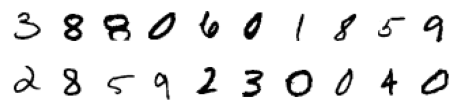

In [652]:
figure = plt.figure()
NoOfImages = 20
for i in range(1, NoOfImages + 1):
    plt.subplot(6, 10, i)
    plt.axis('off')
    plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')

In [653]:
input_size = 784 #28 * 28
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
#one hidden layer
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [654]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader)) #next set
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss




In [655]:
print('Before backward pass:')
print(model[0].weight.grad)
loss.backward()
print('After backward pass:')
print(model[0].weight.grad)

Before backward pass:
None
After backward pass:
tensor([[-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005]])


In [656]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time_at_0 = time()
epochs = 15
for i in range(epochs):
    current_loss = 0
    for i, j in trainloader:
        # Flatten MNIST images into a 784 long vector
        i = i.view(i.shape[0], -1) #for images
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(i)
        loss = criterion(output, j) #for labels
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        current_loss = current_loss + loss.item()
    else:
        print("Epoch",i)
        print("Training loss: ",current_loss/len(trainloader))
print("\nTraining Time (in minutes) :")
print((time()-time_at_0)/60)


Epoch tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        ...,
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]])
Training loss:  0.5164093202524094
Epoch tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        ...,
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]])
Training loss:  0.20441357702660218
Epoch tensor([[-0.4242, -0.4242, -0.4242,  ..., -

In [657]:
def view_classify(image, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(8,10), ncols=2)
    ax1.imshow(image.resize_(1, 28, 28).numpy().squeeze())
    # ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Probability of Class obtained')
    ax2.set_xlim(0, 1.0)
    plt.tight_layout()

Predicted Digit: 
4


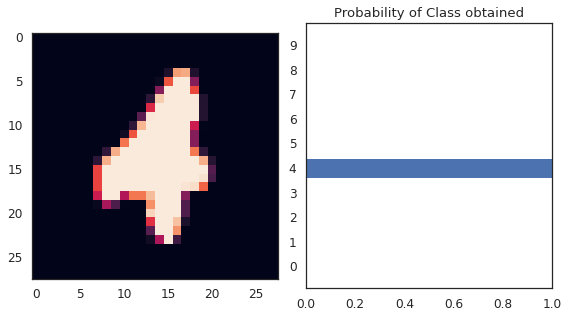

In [658]:
images, labels = next(iter(valloader))

image = images[0].view(1, 784)
with torch.no_grad():
    logps = model(image)

ps = torch.exp(logps)
probability = list(ps.numpy()[0])
print("Predicted Digit: ")
print(probability.index(max(probability)))
view_classify(image.view(1, 28, 28), ps)

In [659]:
count=0
allCount = 0
for images,labels in valloader:
  for i in range(len(labels)):
    image = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(image)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      count += 1
    allCount += 1

print("Number Of Images Tested =", allCount)
print("\nModel Accuracy =", (count/allCount))

Number Of Images Tested = 10000

Model Accuracy = 0.9803


In [660]:
torch.save(model, './my_mnist_model.pt') 